# Import Libraries

In [1]:
# Importing necessary libraries

# Here importing the fundamental library for mathematical calculations.
import pandas as pdy
# Here importing the basic library For modification and analysis of data.
import numpy as num
# Imported here is a basic library used for visualization.
import matplotlib.pyplot as plot
# Here the fundamental library for data visualization is imported.
import seaborn as sns
from sklearn.model_selection import train_test_split
# To reduce dimensionality, use (PCA).
from sklearn.decomposition import PCA
# To standardize feature values, use StandardScaler.
from sklearn.preprocessing import StandardScaler
#From the sklearn.preprocessing package, import the LabelEncoder class.
from sklearn.preprocessing import LabelEncoder
# Import the sklearn.ensemble module's RandomForestClassifier class.
from sklearn.ensemble import RandomForestClassifier
# Here we are importing the numerous purposes served by metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# For the classifications result.
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
# Import the functions required for building neural network models from TensorFlow's Keras module.
from tensorflow.keras.models import Sequential
# Import from Keras the particular layers needed for the model, using TensorFlow as the backend.
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Importing methods from the scikit-learning metrics module: roc_curve, roc_auc_score, and hamming_loss.
from sklearn.metrics import hamming_loss, roc_auc_score, roc_curve
import tensorflow as tf
# This line imports the 'warnings' module, which provides functions for issuing warnings to the user.
import warnings
warnings.simplefilter(action = "ignore")

# Read Data

In [2]:
# Upload the test data using pandas from the given CSV file.
tst_data = pdy.read_csv('test_Smartphones.csv')
# Use pandas to import the train data from the given CSV file.
trin_data = pdy.read_csv('train_Smartphones.csv')
hu_dt = pdy.concat([trin_data, tst_data], ignore_index=True)

# Data Preprocessing

In [3]:
hu_dt.loc[hu_dt['Activity'] == 'WALKING_UPSTAIRS', 'Activity'] = 'GOING_UPSTAIRS'
hu_dt.loc[hu_dt['Activity'] == 'WALKING_DOWNSTAIRS', 'Activity'] = 'GOING_DOWNSTAIRS'

In [4]:
hu_dt.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
hu_dt.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [6]:
hu_dt.Activity.value_counts()

Activity
LAYING              1944
STANDING            1906
SITTING             1777
WALKING             1722
GOING_UPSTAIRS      1544
GOING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [7]:
hu_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [8]:
hu_dt.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
hu_dt.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


# Data Visualization

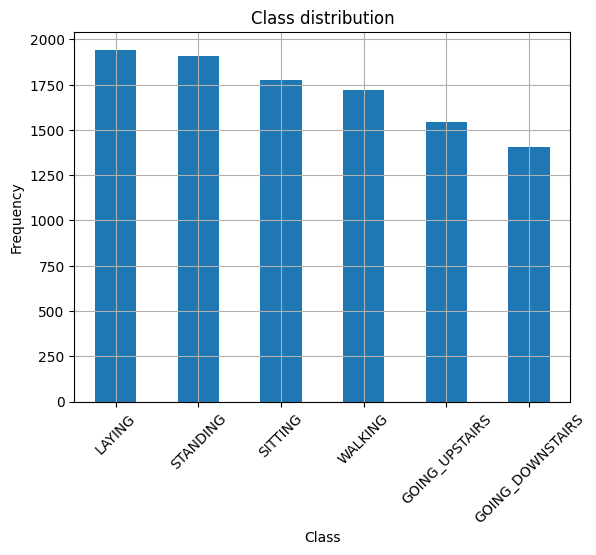

In [10]:
# eval activities
activity_stats = hu_dt.Activity.value_counts()
activities = activity_stats.index.tolist()
activity_stats.plot(kind='bar')
plot.title('Class distribution')
plot.xlabel('Class')
plot.ylabel('Frequency')
names = ['LAYING', 'STANDING', 'SITTING', 'WALKING','GOING_UPSTAIRS', 'GOING_DOWNSTAIRS']
plot.xticks(range(len(activities)), names, rotation=45)
plot.grid()
plot.show()

# Encoding Data

In [11]:
# Initialize the LabelEncoder.
le =LabelEncoder()
# To encode the 'Activity' column, create a new instance of the LabelEncoder.
Activity_le = LabelEncoder()
#Use LabelEncoder to convert the 'Activity' column, then assign the outcome to the same column.
hu_dt['Activity'] = Activity_le.fit_transform(hu_dt['Activity'])

# Data Split [Features - Target]

In [12]:
X = hu_dt.drop("Activity",axis=1)
y = hu_dt["Activity"]

In [13]:
X = num.array(X)
y = num.array(y)

# Standard Scaler

In [14]:
# Considering that your feature matrix is 'X'.
# Make a StandardScaler class instance.
selection  = StandardScaler()
# Utilizing the StandardScaler, fit and modify the data.
Xtrain_hu_df_Scaled=selection.fit_transform(X)

In [15]:
# Determine how many of the constituents you wish to retain.
pca = PCA()
# Create primary components the PCA algorithm to the scale training data.
X_pca = pca.fit_transform(Xtrain_hu_df_Scaled)

# Split Data


In [16]:
Xtrain_hu_df,Xtest_hu_df,ytrain_hu_df,ytest_hu_df= train_test_split(X_pca, y, test_size=0.20)

In [17]:
Xtrain_hu_df.shape, Xtest_hu_df.shape

((8239, 562), (2060, 562))

In [18]:
ytrain_hu_df.shape, ytest_hu_df.shape

((8239,), (2060,))

In [19]:
# ... (previous code)

def model_Results(Y, X, average=None):
    # Convert NumPy arrays to pandas Series
    # Y = pd.Series(Y)
    # X = pd.Series(X)

    # Print a header for all the parameters metrics results.
    print('\033[1m<-------------- All the results -------------->\033[0m')
    average_accuracy1 = accuracy_score(Y, X)
    print(f"Accuracy: {average_accuracy1}")

    # Printing out the precision score of the model.
    print('Precision:', precision_score(Y, X, average=average))

    # Printing the model's recall score.
    print('Recall:', recall_score(Y, X, average=average))

    # Printing the model's f1 score.
    print('F1 Score:', f1_score(Y, X, average=average))

    # Printing a header for the classification report.
    print('\033[1m<-------------- Classification report -------------->\033[0m')
    # Outputting the model's categorization report.
    print(classification_report(Y, X))

    # Designate the model's confusion matrix's header.
    print('\033[1m<-------------- Confusion Matrix -------------->\033[0m')
    con = confusion_matrix(Y, X)
    # Confusion matrix should be heatmapped using Seaborn.
    matrix = sns.heatmap(con, annot=True, fmt='g', linewidths=5, cmap="coolwarm")
    # Assign the heatmap's title, ylabel, and xlabel.
    # Change "Predicted label" to the x-axis label in the confusion matrix graphic.
    matrix.set_xlabel('Predicted label')
    # Make sure the confusion matrix plot's title is "Confusion Matrix."
    matrix.set_title('Confusion Matrix')
    # Set the confusion matrix plot's y-axis label to "True label."
    matrix.set_ylabel('True label')


# LSTM model on 2 cross fold validation

In [20]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [21]:
# Initialize K-Fold Cross-Validator
kf = KFold(n_splits=2)
# Repeat over the divides between the trains and tests produced by KFold cross-valid.
for train_index, test_index in kf.split(X_pca):
    # Divide the dataset using the existing indices.
    Xtrain_hu_df, Xtest_hu_df = X_pca[train_index], X_pca[test_index]
    ytrain_hu_df, ytest_hu_df = y[train_index], y[test_index]
    # Restructure the training set to conform to the a neural network (3D tensor) anticipated input format.
    Xtrain_hu_df_1 = Xtrain_hu_df.reshape(Xtrain_hu_df.shape[0], 1, Xtrain_hu_df.shape[1])
    #Reshape the test data to conform to the RNN's required input format (3D tensor).
    Xtest_hu_df_1 = Xtest_hu_df.reshape(Xtest_hu_df.shape[0], 1, Xtest_hu_df.shape[1])

    # Define the no of class.
    num_classes = len(num.unique(ytrain_hu_df))

    # Create and train an LSTM model
    lstm_model = Sequential()
    # Include a 50-unit LSTM layer with a activation function and an input shape determined by the training set.
    lstm_model.add(LSTM(units=50, activation='sigmoid', input_shape=(Xtrain_hu_df_1.shape[1], Xtrain_hu_df_1.shape[2])))
    # Include a softmax activation function and a number of units equivalent to the no of class.
    lstm_model.add(Dense(units=num_classes, activation='softmax'))
    # Build the Adam optimizer, using accuracy as the evaluation measure and sparse categorical crossentropy loss.
    lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = lstm_model.fit(Xtrain_hu_df_1, ytrain_hu_df, epochs=5, batch_size=32, verbose=1,
                   validation_data=(Xtest_hu_df_1, ytest_hu_df))

    # Predict using LSTM test.
    ytest_hu_df_pred_lstm2 = num.argmax(lstm_model.predict(Xtest_hu_df_1), axis=-1)
    ytrain_hu_df_pred_lstm2 = num.argmax(lstm_model.predict(Xtrain_hu_df_1), axis=-1)


Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6186 - loss: 1.3260 - val_accuracy: 0.9019 - val_loss: 0.6314
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9619 - loss: 0.4145 - val_accuracy: 0.9247 - val_loss: 0.3399
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.1806 - val_accuracy: 0.9301 - val_loss: 0.2498
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.1073 - val_accuracy: 0.9350 - val_loss: 0.2125
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0712 - val_accuracy: 0.9373 - val_loss: 0.1975
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5955 - loss: 1.3638 - val_accuracy: 0.9033 - val_loss: 0.6652
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9518 - loss: 0.4434 - val_accuracy: 0.9326 - val_loss: 0.3550
Epoch 3/5
161/161 ━━━━━━━━━

# Test Result

<-------------- All the results -------------->
Accuracy: 0.9427073218100602
Precision: 0.9427073218100602
Recall: 0.9427073218100602
F1 Score: 0.9427073218100602
<-------------- Classification report -------------->
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       728
           1       0.93      0.99      0.96       807
           2       1.00      0.95      0.97       966
           3       0.93      0.90      0.91       864
           4       0.86      0.94      0.90       926
           5       0.96      1.00      0.98       858

    accuracy                           0.94      5149
   macro avg       0.95      0.94      0.94      5149
weighted avg       0.95      0.94      0.94      5149

<-------------- Confusion Matrix -------------->


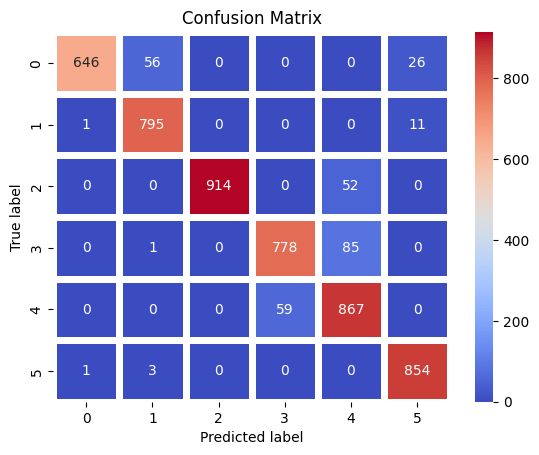

In [22]:
model_Results(ytest_hu_df, ytest_hu_df_pred_lstm2, average='micro')

# Train Result

<-------------- All the results -------------->
Accuracy: 0.9914563106796116
Precision: 0.9914563106796116
Recall: 0.9914563106796116
F1 Score: 0.9914563106796116
<-------------- Classification report -------------->
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      1.00      1.00       737
           2       1.00      1.00      1.00       978
           3       0.97      0.98      0.98       913
           4       0.98      0.97      0.98       980
           5       1.00      1.00      1.00       864

    accuracy                           0.99      5150
   macro avg       0.99      0.99      0.99      5150
weighted avg       0.99      0.99      0.99      5150

<-------------- Confusion Matrix -------------->


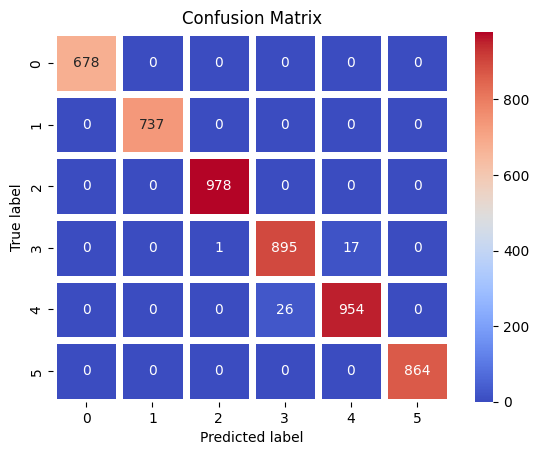

In [23]:
model_Results(ytrain_hu_df, ytrain_hu_df_pred_lstm2, average='micro')

# LSTM model on 10 cross fold validation

In [24]:
#Set the K-Fold Cross-Validator to Start.
kf = KFold(n_splits=10)
# Iterate over the test and train indices that KFold produced using the PCA-transformed data.
for train_index, test_index in kf.split(X_pca):  # Use X_pca, y_pca for KFold
    # Utilizing the existing fold indices, extract testing and training data.
    Xtrain_hu_df_fold, Xtest_hu_df_fold = X_pca[train_index], X_pca[test_index]
    ytrain_hu_df_fold, ytest_hu_df_fold = y[train_index], y[test_index]
    # Modify training data to add a time dimension and make it suit the input format that the RNN model expects.
    Xtrain_hu_df_fold_1 = Xtrain_hu_df_fold.reshape(Xtrain_hu_df_fold.shape[0], 1, Xtrain_hu_df_fold.shape[1])
    # Modify test data in a comparable way.
    Xtest_hu_df_fold_1 = Xtest_hu_df_fold.reshape(Xtest_hu_df_fold.shape[0], 1, Xtest_hu_df_fold.shape[1])

    # Define the number of classes
    num_classes = len(num.unique(ytrain_hu_df_fold))

    # Create and train an LSTM model
    lstm_model = Sequential()
    # Include a 16-unit LSTM layer with a activation function and an input shape determined by the dimensions of the training data.
    lstm_model.add(LSTM(units=16, activation='sigmoid', input_shape=(Xtrain_hu_df_fold_1.shape[1], Xtrain_hu_df_fold_1.shape[2])))

    lstm_model.add(Dense(units=num_classes, activation='softmax'))
    # Build the Adam optimizer, accuracy as the measure, and sparse categorical crossentropy loss.
    lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = lstm_model.fit(Xtrain_hu_df_fold_1, ytrain_hu_df_fold, epochs=5, batch_size=360, verbose=0, validation_data=(Xtest_hu_df_fold_1, ytest_hu_df_fold))

    # Predict using LSTM test.
    ytest_hu_df_pred_lstm1 = num.argmax(lstm_model.predict(Xtest_hu_df_fold_1), axis=-1)
    ytrain_hu_df_pred_lstm1 = num.argmax(lstm_model.predict(Xtrain_hu_df_fold_1), axis=-1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


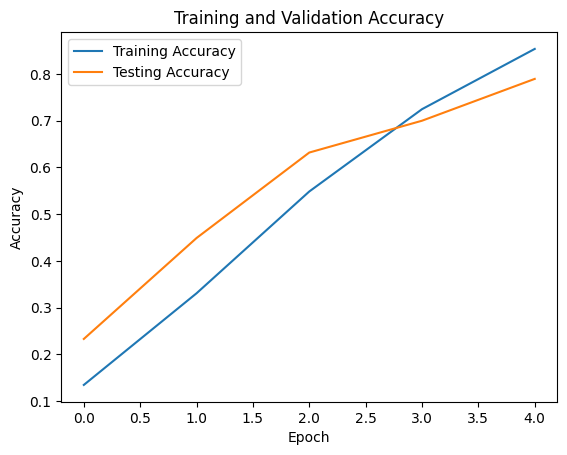

In [25]:
# Make an index 0 new figure.
plot.figure(0)
# Plot training accuracy across epochs and name the legend.
plot.plot(history.history['accuracy'], label='Training Accuracy')
# Plot the accuracy of the tests over epochs and name the legend.
plot.plot(history.history['val_accuracy'], label='Testing Accuracy')
# Show the x-axis label to 'Epoch'.
plot.xlabel('Epoch')
# show the y-axis label to 'Accuracy'.
plot.ylabel('Accuracy')
# Show the legend, which has labels from the earlier plot requests.
plot.legend()
# Display the title of the plot.
plot.title('Training and Validation Accuracy');


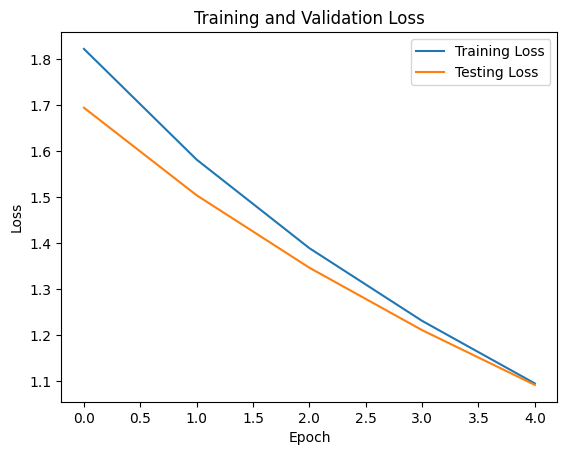

In [26]:
# Plotting the loss
# Producing a fresh figure for the plot.
plot.figure(0)
# Plotting and identifying the training-related loss over epochs.
plot.plot(history.history['loss'], label='Training Loss')
# Display the testing loss and labeling it over epochs.
plot.plot(history.history['val_loss'], label='Testing Loss')
# Show labels to the X and Y axes.
plot.xlabel('Epoch')
plot.ylabel('Loss')
# Using a legend to show the difference between testing and training loss.
plot.legend()
# Determining the plot's title.
plot.title('Training and Validation Loss')
plot.show()

# Test Result

<-------------- All the results -------------->
Accuracy: 0.7891156462585034
Precision: 0.7891156462585034
Recall: 0.7891156462585034
F1 Score: 0.7891156462585034
<-------------- Classification report -------------->
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       155
           1       0.53      1.00      0.69       168
           2       1.00      1.00      1.00       205
           3       1.00      0.61      0.76       161
           4       0.73      1.00      0.84       175
           5       1.00      0.41      0.58       165

    accuracy                           0.79      1029
   macro avg       0.88      0.78      0.77      1029
weighted avg       0.88      0.79      0.78      1029

<-------------- Confusion Matrix -------------->


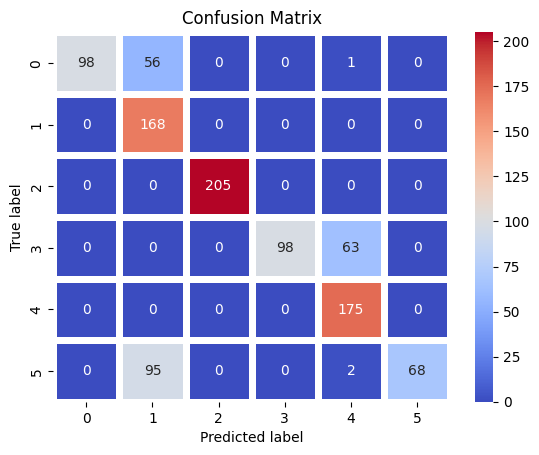

In [27]:
model_Results(ytest_hu_df_fold, ytest_hu_df_pred_lstm1, average='micro')

# Train Result

<-------------- All the results -------------->
Accuracy: 0.8969795037756203
Precision: 0.8969795037756203
Recall: 0.8969795037756203
F1 Score: 0.8969795037756203
<-------------- Classification report -------------->
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1251
           1       0.79      0.99      0.88      1376
           2       0.98      1.00      0.99      1739
           3       0.99      0.67      0.80      1616
           4       0.77      0.99      0.87      1731
           5       0.98      0.82      0.89      1557

    accuracy                           0.90      9270
   macro avg       0.92      0.90      0.90      9270
weighted avg       0.92      0.90      0.90      9270

<-------------- Confusion Matrix -------------->


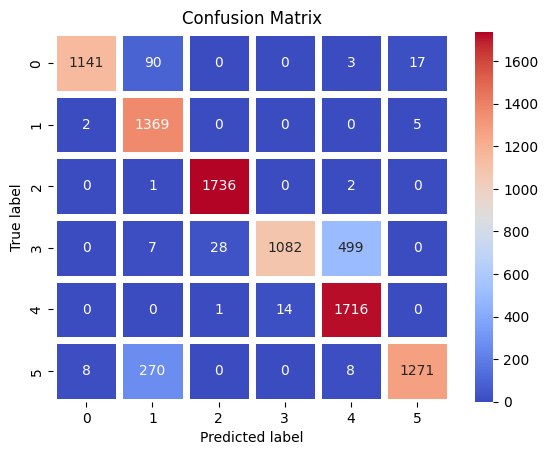

In [28]:
model_Results(ytrain_hu_df_fold, ytrain_hu_df_pred_lstm1,average='micro')

# ANN model on 2 fold cross validation

In [29]:
kf = KFold(n_splits=2)

# Iterate over the indices produced by k-fold cross-valid method.
for train_index, test_index in kf.split(X_pca):
    # Divide the data using the present fold indices into sets for training and testing.
    Xtrain_hu_df_fold, Xtest_hu_df_fold = X_pca[train_index], X_pca[test_index]
    ytrain_hu_df_fold, ytest_hu_df_fold = y[train_index], y[test_index]
    # No need for reshaping in ANN, X_pca is already 2D.
    Xtrain_hu_df_fold_1 = Xtrain_hu_df_fold
    Xtest_hu_df_fold_1 = Xtest_hu_df_fold

    # Define the no of class.
    num_classes = len(num.unique(ytrain_hu_df_fold))

    # Create and train an ANN model
    ann_model = Sequential()
    # Using the characteristics of the training data, add a layer with 32 units, a activation function, and an input shape.
    ann_model.add(Dense(units=32, activation='sigmoid', input_shape=(Xtrain_hu_df_fold_1.shape[1],)))
    # Incorporate a dense layer using the softmax activation function, using an amount of units equal to the total amount of classes.
    ann_model.add(Dense(units=num_classes, activation='softmax'))
    #Build the Adam optimizer, using accuracy as the evaluation measure and sparse categorical crossentropy loss.
    ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = ann_model.fit(Xtrain_hu_df_fold_1, ytrain_hu_df_fold, epochs=5, batch_size=360, verbose=0, validation_data=(Xtest_hu_df_fold_1, ytest_hu_df_fold))

    # Predict using ANN test.
    ytest_hu_df_pred_ann2 = num.argmax(ann_model.predict(Xtest_hu_df_fold_1), axis=-1)
    ytrain_hu_df_pred_ann2 = num.argmax(ann_model.predict(Xtrain_hu_df_fold_1), axis=-1)

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step


# Test Result

<-------------- All the results -------------->
Accuracy: 0.8506506117692756
Precision: 0.8506506117692756
Recall: 0.8506506117692756
F1 Score: 0.8506506117692756
<-------------- Classification report -------------->
              precision    recall  f1-score   support

           0       0.99      0.65      0.78       728
           1       0.91      0.93      0.92       807
           2       0.92      0.97      0.95       966
           3       0.93      0.60      0.73       864
           4       0.72      0.92      0.81       926
           5       0.78      0.99      0.87       858

    accuracy                           0.85      5149
   macro avg       0.87      0.84      0.84      5149
weighted avg       0.87      0.85      0.85      5149

<-------------- Confusion Matrix -------------->


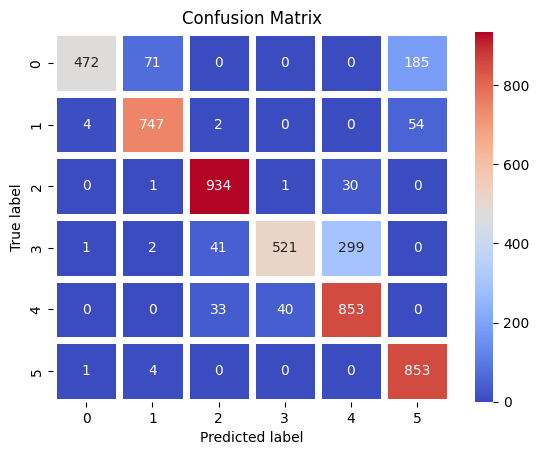

In [30]:
model_Results(ytest_hu_df_fold, ytest_hu_df_pred_ann2, average='micro')

# Train Result

<-------------- All the results -------------->
Accuracy: 0.905242718446602
Precision: 0.905242718446602
Recall: 0.905242718446602
F1 Score: 0.905242718446602
<-------------- Classification report -------------->
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       678
           1       0.95      0.95      0.95       737
           2       0.96      1.00      0.98       978
           3       0.94      0.68      0.79       913
           4       0.78      0.95      0.86       980
           5       0.89      0.98      0.94       864

    accuracy                           0.91      5150
   macro avg       0.92      0.90      0.91      5150
weighted avg       0.91      0.91      0.90      5150

<-------------- Confusion Matrix -------------->


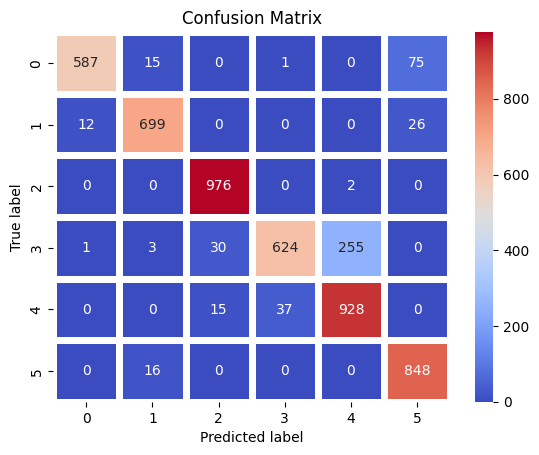

In [31]:
model_Results(ytrain_hu_df_fold, ytrain_hu_df_pred_ann2, average='micro')

# ANN model on 10 fold cross validation

In [32]:
kf = KFold(n_splits=10)
# Repeat using the KFold-generated train and test indices.
for train_index, test_index in kf.split(X_pca):

    Xtrain_hu_df_fold, Xtest_hu_df_fold = X_pca[train_index], X_pca[test_index]
    ytrain_hu_df_fold, ytest_hu_df_fold = y[train_index], y[test_index]

    # No need for reshaping in ANN
    Xtrain_hu_df_fold_1 = Xtrain_hu_df_fold
    Xtest_hu_df_fold_1 = Xtest_hu_df_fold

    # Define the classes.
    num_classes = len(num.unique(ytrain_hu_df_fold))

    # Create and train an ANN model.
    # Construct a model of a sequential neural network.
    ann_model = Sequential()
    # Include a dense layer containing 16 units, sigmoid activation, and an input shape determined by the dimensions of the training data.
    ann_model.add(Dense(units=16, activation='sigmoid', input_shape=(Xtrain_hu_df_fold_1.shape[1],)))
    # To classify, add a thick layer with softmax activation and units equal to the total amount of classes.
    ann_model.add(Dense(units=num_classes, activation='softmax'))
    #Build the Adam, using accuracy as the evaluation measure and sparse categorical crossentropy loss.
    ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Use the data to train the model of neural networks.
    history = ann_model.fit(Xtrain_hu_df_fold_1, ytrain_hu_df_fold, epochs=5, batch_size=465, verbose=0, validation_data=(Xtest_hu_df_fold_1, ytest_hu_df_fold))

    ytest_hu_df_pred_ann1 = num.argmax(ann_model.predict(Xtest_hu_df_fold_1), axis=-1)
    ytrain_hu_df_pred_ann1 = num.argmax(ann_model.predict(Xtrain_hu_df_fold_1), axis=-1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


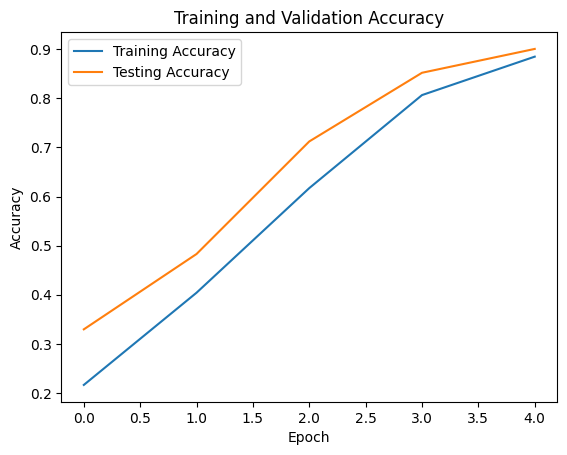

In [33]:
# Making a figure for the plot with index 0.
plot.figure(0)
# Drawing a training accuracy plot over epochs and designating the line.
plot.plot(history.history['accuracy'], label='Training Accuracy')
# Charting the correctness of the validation across epochs and designating the line as "Testing Accuracy".
plot.plot(history.history['val_accuracy'], label='Testing Accuracy')

plot.xlabel('Epoch')
# Show y-axis label as 'Accuracy'.
plot.ylabel('Accuracy')
# Including a legend in the plot according to the labels already assigned.
plot.legend()
# Show a title to the plot.
plot.title('Training and Validation Accuracy');


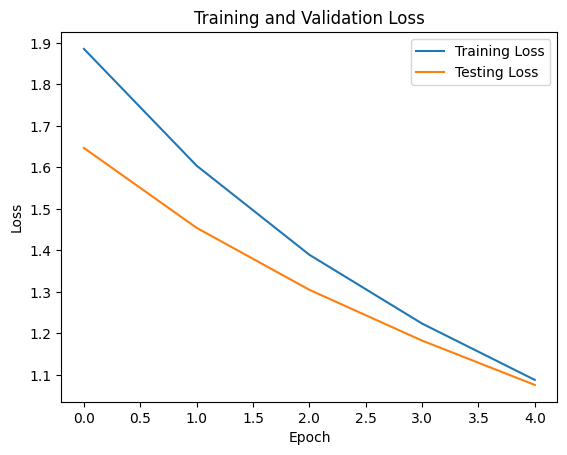

In [34]:
# Developing a fresh character for the story.
plot.figure(0)
# Charting the loss of training across epochs and labeling it for identification.
plot.plot(history.history['loss'], label='Training Loss')
# Charting the testing loss throughout epochs and labeling them with identification.
plot.plot(history.history['val_loss'], label='Testing Loss')
# Display the x-axis as 'Epoch'.
plot.xlabel('Epoch')
# Display the y-axis as 'Loss'.
plot.ylabel('Loss')
#Adding a legend to help distinguish between loss curves used for testing and training.
plot.legend()
# Determining the plot's title.
plot.title('Training and Validation Loss')
#Showing the plot.
plot.show()

# Test Result

<-------------- All the results -------------->
Accuracy: 0.9008746355685131
Precision: 0.9008746355685131
Recall: 0.9008746355685131
F1 Score: 0.9008746355685131
<-------------- Classification report -------------->
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       155
           1       0.88      0.85      0.87       168
           2       0.98      1.00      0.99       205
           3       0.99      0.67      0.80       161
           4       0.80      0.99      0.89       175
           5       0.84      0.98      0.90       165

    accuracy                           0.90      1029
   macro avg       0.91      0.89      0.89      1029
weighted avg       0.91      0.90      0.90      1029

<-------------- Confusion Matrix -------------->


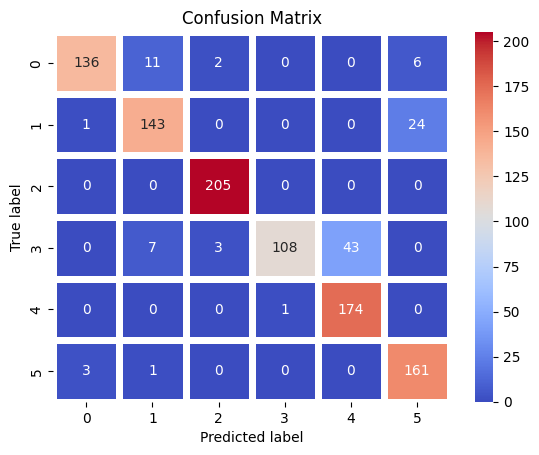

In [35]:
model_Results(ytest_hu_df_fold, ytest_hu_df_pred_ann1, average='micro')

# Train Result

<-------------- All the results -------------->
Accuracy: 0.9086299892125135
Precision: 0.9086299892125135
Recall: 0.9086299892125135
F1 Score: 0.9086299892125135
<-------------- Classification report -------------->
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1251
           1       0.90      0.91      0.91      1376
           2       0.95      1.00      0.97      1739
           3       0.98      0.65      0.78      1616
           4       0.81      0.97      0.88      1731
           5       0.90      0.99      0.94      1557

    accuracy                           0.91      9270
   macro avg       0.92      0.91      0.91      9270
weighted avg       0.92      0.91      0.90      9270

<-------------- Confusion Matrix -------------->


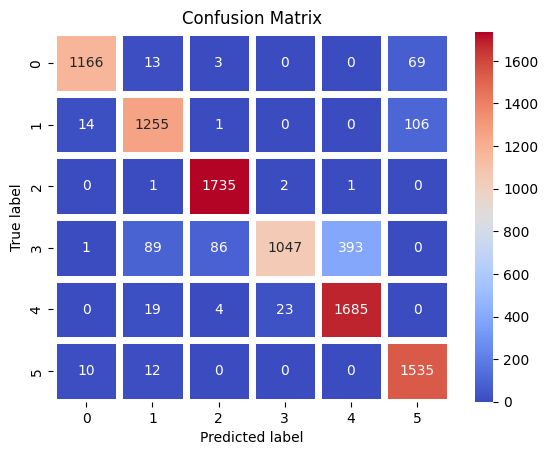

In [36]:
model_Results(ytrain_hu_df_fold, ytrain_hu_df_pred_ann1, average='micro')